In [1]:
import mypaengine as pa
import myqengine as qe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('nvidia_holder_analysis_full_dataset.csv')
df = df.sort_values('aum',ascending= False)


In [2]:
df = df.sort_values('aum',ascending= False)

#Get pa compatible tickers
fund_univ = qe.id_universe(ids = df['ticker'].to_list(),universe_type ='Equity')
time_series = qe.time_series(start_date='0M',end_date = '0M')

formulas = ['LSS_TICKER','FFD_BMK_ID']

q_req = qe.calculate(universe=fund_univ, dates = time_series, formulas=formulas,source= 'ScreeningExpression')
dff = q_req.data
dff

,DATE,UNIVERSE,LSS_TICKER,FFD_BMK_ID
0,20230731,VTSMX,VTSMX-US,CRSPTM
1,20230731,VFINX,None,SP50
2,20230731,FXAIX,FXAIX-US,SP50
3,20230731,SPY,SPY-US,SP50
4,20230731,IVV,IVV-US,SP50
...,...,...,...,...
4514,20230731,QDISX,None,MS664204
4515,20230731,SGLC,SGLC-US,None
4516,20230731,F000013LTI,None,None
4517,20230731,QVMWT4.F,None,None


In [3]:
dff = q_req.data.copy()
dff.rename(columns= {"UNIVERSE":"ticker",
                    'LSS_TICKER':'lionshares_ticker',
                    'FFD_BMK_ID':'bench_id'
                    },inplace=True)
df= df.set_index('ticker')
dff = dff.set_index('ticker')


In [4]:
df = df.join(dff[['lionshares_ticker','bench_id']],how='left')
df = df.dropna()

df['pa_ticker'] = 'LION:'+df['lionshares_ticker']
df['pa_bench'] = 'DEFAULT'

In [5]:
df_f = df.head(100)

#Get point in time weights
pa_data = pa.calc_unlinked_template(portfolios = df_f['pa_ticker'].to_list(),benchmarks =df_f['pa_bench'].to_list(),
                        start_date = '-11M',
                        end_date='0M',
                        template_type_name='Contribution to Return',
                        columns=[{'name' : 'Port. Beginning Weight','category':'Portfolio/Position Data','directory':'Factset'},
                        {'name' : 'Port. Contribution To Return','category':'Portfolio/Contributions to Return','directory':'Factset'},
                        {'name' : 'Total Return','category':'Portfolio/Returns','directory':'Factset'}])

df_full = pd.DataFrame()
for x in list(pa_data.keys()):
    temp = pa_data[x][0]
    temp['pa_calc_id'] = x
    df_full = pd.concat([df_full,temp])

df_full

Calculation Unit Id:LION:AIO-US_DEFAULT Failed!!!
Error message : [{'detail': 'There are invalid dates in the portfolio or benchmark.',
 'id': '5acec7ac680e42e69c7bff85c6a812e2:LION:AIO-US_DEFAULT'}]


,Ticker,total0,group1,group2,Port.+Beginning+Weight,Port.+Contribution+To Return+( Local ),Port.+Total+Return+( Local ),pa_calc_id
0,,Total,,,4.052155,0.890293,32.151628,LION:ACFOX-US_DEFAULT
1,,Commercial Services,,,3.902201,0.999878,20.122626,LION:ACFOX-US_DEFAULT
2,,Commercial Services,Financial Publishing/Services,,3.214276,-0.049315,12.858521,LION:ACFOX-US_DEFAULT
3,SPGI,Commercial Services,Financial Publishing/Services,"S&P Global, Inc.",3.214276,-0.049315,12.858521,LION:ACFOX-US_DEFAULT
4,,Commercial Services,Miscellaneous Commercial Services,,4.017841,1.176247,21.343715,LION:ACFOX-US_DEFAULT
...,...,...,...,...,...,...,...,...
287,,[Unassigned],[Unassigned],,1.316037,,,LION:FIGRX-US_DEFAULT
288,LS000015,[Unassigned],[Unassigned],EQUITY OTHER,,,,LION:FIGRX-US_DEFAULT
289,BQ3QZX4,[Unassigned],[Unassigned],Essilorluxottica Eur0.18(Stk Div 07/06/2023),,,,LION:FIGRX-US_DEFAULT
290,LS000011,[Unassigned],[Unassigned],PRIVATE PLACEMENT SECURITIES,1.344519,,,LION:FIGRX-US_DEFAULT


In [6]:
df_full.to_csv('nvidia_pa_contribution_analysis_dataset.csv')

In [7]:
df_full = df_full.replace('',np.nan)
dfn = df_full[df_full['Ticker']=='NVDA']



In [10]:
dfn = dfn[dfn['pa_calc_id']!='LION:ACV-US_DEFAULT']

<Axes: xlabel='Port.+Beginning+Weight', ylabel='Port.+Contribution+To Return+( Local )'>

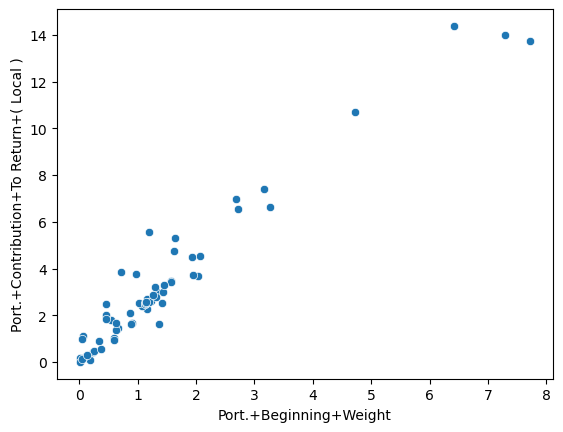

In [20]:
sns.scatterplot(data =dfn,x='Port.+Beginning+Weight', y ='Port.+Contribution+To Return+( Local )')

<Axes: ylabel='Frequency'>

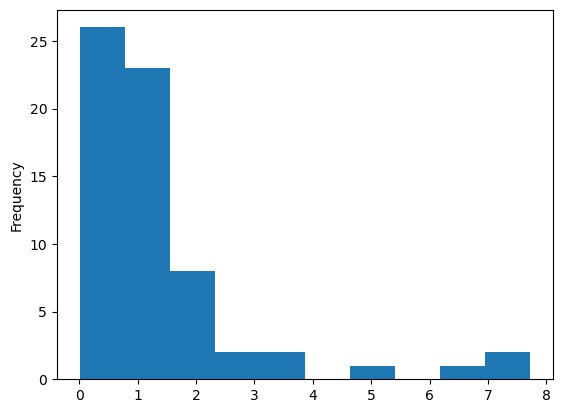

In [16]:
dfn['Port.+Beginning+Weight'].plot(kind ='hist')

In [17]:
dfn[dfn['Port.+Beginning+Weight']>4]

,Ticker,total0,group1,group2,Port.+Beginning+Weight,Port.+Contribution+To Return+( Local ),Port.+Total+Return+( Local ),pa_calc_id
15,NVDA,Electronic Technology,Semiconductors,NVIDIA Corporation,7.726021,13.755028,209.836116,LION:BOTZ-US_DEFAULT
13,NVDA,Electronic Technology,Semiconductors,NVIDIA Corporation,7.296726,14.011251,209.836116,LION:ESPO-US_DEFAULT
121,NVDA,Electronic Technology,Semiconductors,NVIDIA Corporation,4.713682,10.703959,209.836116,LION:FBGRX-US_DEFAULT
121,NVDA,Electronic Technology,Semiconductors,NVIDIA Corporation,6.423155,14.387872,209.836116,LION:FDGRX-US_DEFAULT
